In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
%matplotlib inline

data = pd.read_csv(r'C:\projects\Python\mlcourse_open\Lesson2\titanic.csv', index_col = 'PassengerId')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


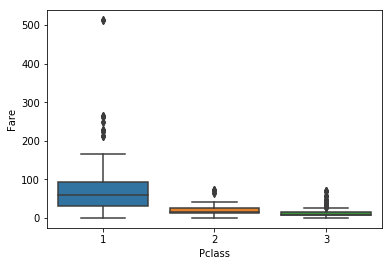

In [19]:
sns.boxplot(x='Pclass', y='Fare', data=data);



In [20]:
data['Fare_no_out'] = data['Fare']
fare_pclass1 = data[data['Pclass'] == 1]['Fare']
fare_pclass2 = data[data['Pclass'] == 2]['Fare']
fare_pclass3 = data[data['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - 
                                    fare_pclass1.mean()).abs()  
                                   < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - 
                                    fare_pclass2.mean()).abs()  
                                   < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - 
                                    fare_pclass3.mean()).abs() 
                                   < 2 * fare_pclass3.std()]
data['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

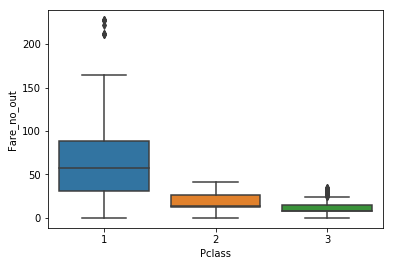

In [22]:
sns.boxplot(x = 'Pclass', y = 'Fare_no_out', data = data)

In [23]:
pd.crosstab(data['Survived'], data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


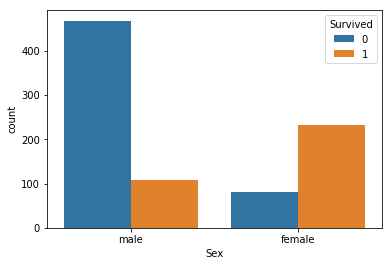

In [25]:
sns.countplot(x = 'Sex', hue = 'Survived', data = data);

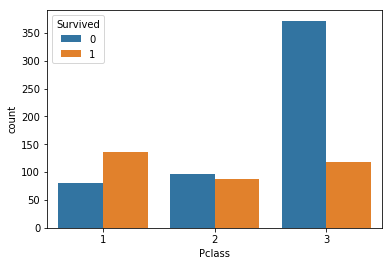

In [27]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data);

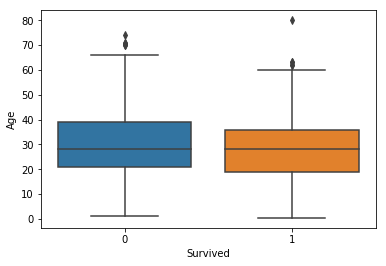

In [28]:
sns.boxplot(x = 'Survived', y = 'Age', data = data);

In [32]:
data['age_cat'] = data['Age'].apply(lambda age: 1 if age < 30 
                                            else 3 if age > 60 else 2);



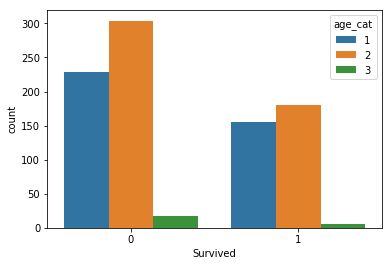

In [33]:
sns.countplot(x = 'Survived', hue = 'age_cat', data = data);

## Метод поска имени!

In [ ]:
df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])

In [5]:
all_female_name = data[(data['Sex'] == 'female') & data['Name']]
list_Name = all_female_name['Name'].values

all_female_name['Name']

PassengerId
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
19     Vander Planke, Mrs. Julius (Emelia Maria Vande...
20                               Masselmani, Mrs. Fatima
23                           McGowan, Miss. Anna "Annie"
25                         Palsson, Miss. Torborg Danira
26     Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
29                         O'Dwyer, Miss. Ellen "Nellie"
32        Spencer, Mrs. William Augustus (Marie Eugenie)
33                              Glynn, Miss. Mary Agatha
39                 

In [6]:
List_words_Femname = np.concatenate(all_female_name['Name'].apply(lambda s: s.replace('Mrs.', '')
                                                               .replace('(', '')
                                                               .replace(')', '')
                                                               .replace('Miss.', '')
                                                               .replace('"', '')
                                                               .replace(',', '').split()).values)

In [7]:
words_Female_Name_count = pd.Series(List_words_Femname).value_counts()
words_Female_Name = pd.Series(List_words_Femname)
words_Female_Name_count.head()

Mary         20
Anna         17
William      15
Elizabeth    15
Margaret     12
dtype: int64

In [100]:
all_female_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 12 columns):
PassengerId    314 non-null int64
Survived       314 non-null int64
Pclass         314 non-null int64
Name           314 non-null object
Sex            314 non-null object
Age            261 non-null float64
SibSp          314 non-null int64
Parch          314 non-null int64
Ticket         314 non-null object
Fare           314 non-null float64
Cabin          97 non-null object
Embarked       312 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 33.8+ KB


In [8]:
List_clear_Name = []

for s in list_Name:
    List_clear_Name.append(s.replace('Mrs.', '').replace('(', '').replace(')', '').replace('Miss.', '')\
                                       .replace('"', '').replace(',', '').split())
List_cleaar_Name_concat = np.concatenate(List_clear_Name)   
List_cleaar_Name_concat

array(['Cumings', 'John', 'Bradley', ..., 'Catherine', 'Helen', 'Carrie'],
      dtype='<U15')

In [124]:
words_series100 = pd.Series(List_cleaar_Name_concat).value_counts()


In [125]:
not_cocat = all_female_name['Name'].apply(lambda s: s.replace('Mrs.', '').replace('(', '').replace(')', '')
                                                                     .replace('Miss.', '')\
                                                                     .replace('"', '')
                                                                     .replace(',', '').split())


In [15]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 

salaries

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [16]:
salaries.Charles = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles      NaN
Ann        250.0
dtype: float64

In [17]:
salaries.fillna(salaries.median(), inplace = True)

In [134]:
salaries

Andrew     400.0
Bob        300.0
Charles    300.0
Ann        250.0
dtype: float64

In [136]:
data.shape

(891, 12)

In [137]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [140]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [152]:
Surv_Pclass = data.groupby(data['Pclass'])['Survived'].value_counts()
Surv_Pclass

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [170]:
obj4 = Series([12112, 1123123], index =['Calif', 'NY'])
obj4.name = 'population'
obj4.index.name = 'state'

obj4




state
Calif      12112
NY       1123123
Name: population, dtype: int64

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

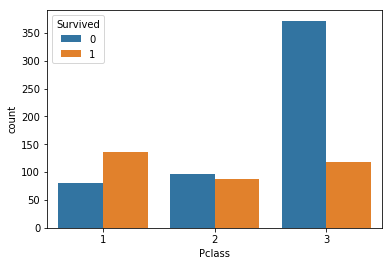

In [150]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = data);
ax;
